# Starbucks_Capstone_notebook

In [136]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 1- Data Preparing I

I will explore each dataset individually, assess the required change to prepare it for Exploration Data Analysis stage.
the cleaning here wil be initial for this stage, this when it comes for modeling, more cleaning will be required.

## Portfolio Dataset

portfolio.json Offers sent during 30-day test period 

- reward: (numeric) money awarded for the amount spent
- channels: (list) web, email, mobile, social
- difficulty: (numeric) money required to be spent to receive reward
- duration: (numeric) time for offer to be open, in days
- offer_type: (string) bogo, discount, informational
- id: (string/hash

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
portfolio.shape

(10, 6)

So we have 10 different offers that have been provided 

In [4]:
#check the columns types 
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


All the columns have the right data type, also we have no missing values, good.

#### Assessment : 
For now, we only need to rename some columns such as id , duration and difficulty, so it will be easier for reading and merging process later 

### Portfolio Cleaning:

In [5]:
def rename_cols(df, new_cols_name):
    """
       Rename coulmns names
       
       inputs:
       --------
       df : the dataframe
       new_name : dictionary contains the new name for each coulmn 
       
    """
    df= df.rename(columns = new_cols_name)
    return df

In [6]:
#dictionary holds new column names 
new_cols_name = {'difficulty':'offer_difficulty' , 'id':'offer_id', 'duration':'offer_duration', 'reward': 'offer_reward'}
#call the function
cleaned_portfolio = rename_cols(portfolio, new_cols_name )

In [7]:
#check
cleaned_portfolio.head()

,channels,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [173]:
cleaned_portfolio.columns

Index(['channels', 'offer_difficulty', 'offer_duration', 'offer_id',
       'offer_type', 'offer_reward'],
      dtype='object')

## Profile Dataframe
Rewards program users
- gender: (categorical) M, F, O, or null
- age: (numeric) missing value encoded as 118
- id: (string/hash)
- became_member_on: (date) format YYYYMMDD
- income: (numeric)

In [8]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


it seems we have null values

In [135]:
#check null values 
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

According to the data dictionary, if the gender has 118 as value it means it is a nana , so let's check 

In [11]:
#check gender missing values
profile[profile['age']== 118].age.count()

2175

In [12]:
profile[profile['age']== 118].drop(['became_member_on' ,'id'], axis=1)

,age,gender,income
0,118,None,NaN
2,118,None,NaN
4,118,None,NaN
6,118,None,NaN
7,118,None,NaN
9,118,None,NaN
10,118,None,NaN
11,118,None,NaN
17,118,None,NaN
23,118,None,NaN


it seems that if the age is missing , also the income and gender are missing

In [13]:
#statical description 
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


the maximum of the age is 118 , which as we checked it means missing vlaue , but lets dig deeper in the age column

In [14]:
#check the values of the age 
profile.age.value_counts()

118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
63      338
60      333
49      321
62      318
67      317
64      311
61      309
48      288
50      284
66      284
65      280
68      259
70      252
69      242
47      232
45      231
71      230
42      227
43      215
46      212
       ... 
22      131
30      131
29      129
23      126
81      118
35      118
79      117
80      116
31      113
82      105
83      102
84       83
18       70
85       70
87       66
88       64
86       54
89       53
90       52
91       47
92       40
94       33
93       29
95       22
97       13
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

In [15]:
#check who's above 80 but not 118 
profile[(profile['age'] > 80) & (profile['age'] < 118)]

,age,became_member_on,gender,id,income
33,96,20171117,F,868317b9be554cb18e50bc68484749a2,89000.0
94,89,20171114,F,4264b1d027cc493281bba4f44bfedaca,87000.0
98,90,20151210,F,1c587de019994f93a242c6864fd7bc55,98000.0
126,83,20180127,M,4c29d22467af4d7faa137c4eedd65340,46000.0
131,89,20180114,F,3dae0eadb47149b0b9b548d14548524b,65000.0
167,85,20180726,M,4e233f02eff840c7a3e5ec15d55d7d23,67000.0
186,82,20161231,M,c79da41557894c7eacc5c0156dc1f4dc,87000.0
202,81,20180503,M,accec36a10704e1fbaeb9b28b8bc5da8,93000.0
210,82,20180319,M,d2e88e95c0ae41c0980e4cfc10d162d8,73000.0
214,82,20180108,M,5a3d291f75984396b6eb2800206ec716,72000.0


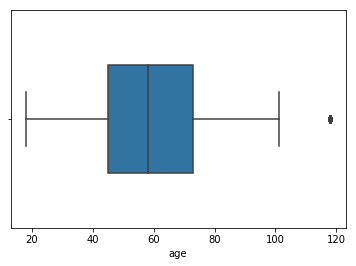

In [16]:
sns.boxplot(profile['age'], width=0.5);

For me, I found it weird that people with age between 80 & 100 are in starbucks dataset, I don't see that elderly people tend to drink 
or go to coffee shops or can use the app. So I consider people over 75 as outliers. 

#### Assessment:
For now:
* change some columns names such as id and income so it is easier for us later for reading and merging process 
* I  want to keep most of the data for EDA, so I will impute the null values, for age and income I will choose the mean, and for the gender I will use the mode 
* I will consider people who's above 75 as outliers, I will delete them from the dataset
* I will add extra coulmn for age range, easier to read when we want to do EDA , i will divide the age into groups like:
    - under 20 
    - 20 - 45
    - +64


### Profile Cleaning :

In [138]:
#change the columns names:
#map to new names
cols_profile = {'id':'customer_id' , 'income':'customer_income'}
#call funtion
cleaned_profile = rename_cols(profile, cols_profile )        

In [139]:
cleaned_profile.columns

Index(['age', 'became_member_on', 'gender', 'customer_id', 'customer_income'], dtype='object')

In [140]:
def cleaning_profile(df):
    """
       Return a cleaned version profile dataframe
       
        inputs:
        ---------
       df : profile dataframe
    """
    
    
    #null values 
    #replace 118 values in age column with nan so we can replace them
    df.replace(118, np.nan , inplace=True)
    #replace it with mean 
    df['age'] = df['age'].fillna(df['age'].mean())
    #replace the missing values in income with the mean
    df['customer_income'] = df['customer_income'].fillna(df['customer_income'].mean())
    #replace the gender with the mode (most freq)
    mode = df['gender'].mode()[0]
    df['gender'] = df['gender'].fillna(mode)
    
    #outliers
    #remove the people who's above 75
    df = df[df['age'] < 75]
    df['age'] = df['age'].astype(int)
    
    #add age group column
    df.loc[(df.age < 20) , 'Age_group'] = 'under 20'
    df.loc[(df.age >= 20) & (df.age <= 45) , 'Age_group'] = '20-45'
    df.loc[(df.age >= 46) , 'Age_group'] = '46+'
    df.drop('age',axis=1,inplace=True)
    return df

In [141]:
cleaned_profile = cleaning_profile(cleaned_profile)

In [21]:
#check new coulmns 
cleaned_profile.head()

,became_member_on,gender,customer_id,customer_income,Age_group
0,20170212,M,68be06ca386d4c31939f3a4f0e3dd783,65404.991568,46+
1,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.000000,46+
2,20180712,M,38fe809add3b4fcf9315a9694bb96ff5,65404.991568,46+
4,20170804,M,a03223e636434f42ac4c3df47e8bac43,65404.991568,46+
5,20180426,M,e2127556f4f64592b11af22de27a7932,70000.000000,46+


In [22]:
#check became_member_on datatype
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15191 entries, 0 to 16999
Data columns (total 5 columns):
became_member_on    15191 non-null int64
gender              15191 non-null object
customer_id         15191 non-null object
customer_income     15191 non-null float64
Age_group           15191 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 712.1+ KB


In [23]:
#check missing values 
cleaned_profile.isnull().sum()

became_member_on    0
gender              0
customer_id         0
customer_income     0
Age_group           0
dtype: int64

In [27]:
cleaned_profile.shape

(15191, 5)

# Transcript Dataframe 

Event log
- person: (string/hash)
- event: (string) offer received, offer viewed, transaction, offer completed
- value: (dictionary) different values depending on event type
- offer id: (string/hash) not associated with any "transaction"
- amount: (numeric) money spent in "transaction"
- reward: (numeric) money gained from "offer completed"
- time: (numeric) hours after start of test

In [28]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [29]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [142]:
#check null values
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

it seems there are no missing values and no need to change the datatype for now. 

let's invistigate the value coulmn

In [31]:
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

we can see that there are 3 possible values , offer id , reward and amount, depends on offer type.
Also there are 'offer_id' and 'offer id' but they are the same. 

### Assessment:

* some columns need to change their name such as person.
* for the value column I will expand the dictionary's keys into columns

### Transcript Cleaning 

In [143]:
#dictionary holds new columns names
transcript_cols = {'person':'customer_id'}
cleaned_transcript = rename_cols(transcript, transcript_cols)

In [144]:
#check
cleaned_transcript.columns

Index(['event', 'customer_id', 'time', 'value'], dtype='object')

In [34]:
def cleaning_transcript(df):
    """
       Return a cleaned version transcript dataframe
       
       inputs:
       --------
       df : the dataframe
       
       output:
       dataframe with new coulmns:
       money_gained : money gained from "offer completed"
       money_spent : money spent in "transaction"
       offer_id 
    """
    
    #expand the dictionary to coulmns 
    df['offer_id'] = df['value'].apply(lambda x: x.get('offer_id'))
    df['offer id'] = df['value'].apply(lambda x: x.get('offer id'))
    df['money_gained'] = df['value'].apply(lambda x: x.get('reward'))
    df['money_spent'] = df['value'].apply(lambda x: x.get('amount'))
    
    #compare pull the values of offer id into offer_id
    df['offer_id'] = df.apply(lambda x : x['offer id'] if x['offer_id'] == None else x['offer_id'], axis=1)
    #drop offer id column 
    df.drop(['offer id' , 'value'] , axis=1, inplace=True)
    #replace nan
    df.fillna(0 , inplace=True)
    
    return df

In [35]:
cleaned_transcript = cleaning_transcript(cleaned_transcript)

In [36]:
#check
cleaned_transcript.head()

,event,customer_id,time,offer_id,money_gained,money_spent
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


In [37]:
cleaned_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
event           306534 non-null object
customer_id     306534 non-null object
time            306534 non-null int64
offer_id        306534 non-null object
money_gained    306534 non-null float64
money_spent     306534 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ MB


# Exploration Data Analysis (EDA)

In order to start EDA , we have to merge the three dataset 

In [38]:
def merge_data(portfolio,profile,transcript):
    """
       merge the three datasets
       
       inputs:
       ---------
       portfolio : cleaned portfolio dataset
       profile : cleaned profile dataset
       transcript : cleaned transcript
    """
    final_df = pd.merge(portfolio, transcript, on='offer_id')
    final_df = pd.merge(final_df, profile, on='customer_id')
    
    return final_df

In [39]:
final_df = merge_data(cleaned_portfolio , cleaned_profile , cleaned_transcript)

In [40]:
final_df.head()

,channels,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,event,customer_id,time,money_gained,money_spent,became_member_on,gender,customer_income,Age_group
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,0,0.0,0.0,20170909,M,100000.0,46+
1,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,102,0.0,0.0,20170909,M,100000.0,46+
2,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,504,0.0,0.0,20170909,M,100000.0,46+
3,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,510,0.0,0.0,20170909,M,100000.0,46+
4,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer completed,4b0da7e80e5945209a1fdddfe813dbe0,510,10.0,0.0,20170909,M,100000.0,46+


In [41]:
final_df.to_csv('data/final_df.csv')

now the data is ready for Exploration Data Analysis stage. I am interested to see what the data is telling us. through the exploration I will find answers for some questions that I am interesting in. below each question I briefly discussed the results. 

In [42]:
final_df

,channels,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,event,customer_id,time,money_gained,money_spent,became_member_on,gender,customer_income,Age_group
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,0,0.0,0.0,20170909,M,100000.000000,46+
1,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,102,0.0,0.0,20170909,M,100000.000000,46+
2,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,504,0.0,0.0,20170909,M,100000.000000,46+
3,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,510,0.0,0.0,20170909,M,100000.000000,46+
4,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer completed,4b0da7e80e5945209a1fdddfe813dbe0,510,10.0,0.0,20170909,M,100000.000000,46+
5,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,offer received,4b0da7e80e5945209a1fdddfe813dbe0,408,0.0,0.0,20170909,M,100000.000000,46+
6,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,468,0.0,0.0,20170909,M,100000.000000,46+
7,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,offer received,4b0da7e80e5945209a1fdddfe813dbe0,168,0.0,0.0,20170909,M,100000.000000,46+
8,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,174,0.0,0.0,20170909,M,100000.000000,46+
9,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,offer completed,4b0da7e80e5945209a1fdddfe813dbe0,180,5.0,0.0,20170909,M,100000.000000,46+


In [43]:
final_df.shape

(149154, 15)

##  Q) what is the average income of customers in the dataset? 

In [44]:
final_df['customer_income'].mean()

65577.444263555386

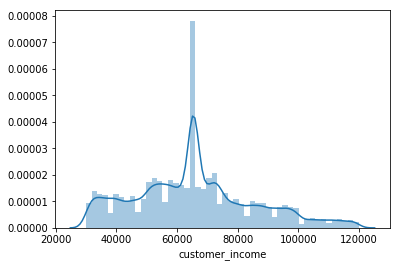

In [46]:
sns.distplot(final_df['customer_income'], bins=50, hist_kws={'alpha': 0.4});

as shown in above, most customers have income above 60k. The data is approximately normal distributed.    

##  Q) What is the most used offer? 

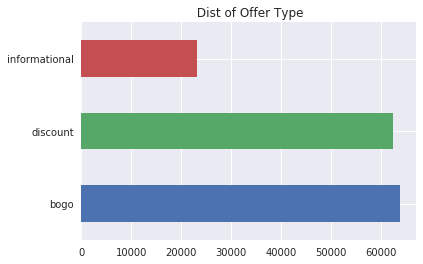

In [145]:
final_df['offer_type'].value_counts().plot.barh(title=' Dist of Offer Type')

BOGO and discount offers have approximately the same distributions in this dataset. 

## Q) What is the distribution of the age?

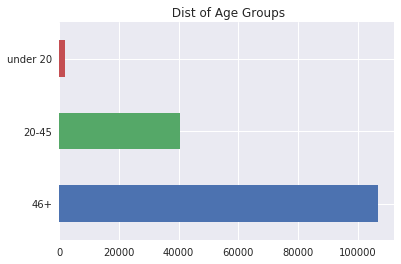

In [146]:
final_df['Age_group'].value_counts().plot.barh(title=' Dist of Age Groups')

Most of the customers are 46 and above. this is intersting for me, I thought people who's between 20 and 45 are more likly to drink from 
startbucks. 

## Q) What people tend to do with the offers?

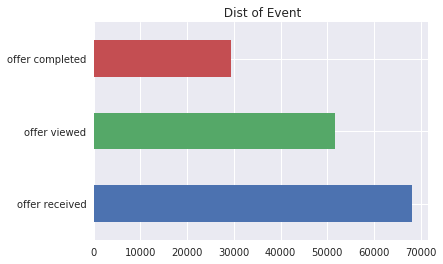

In [147]:
final_df['event'].value_counts().plot.barh(title=' Dist of Event')

Most people don't pay attention to the offer, not event see it. also, people who only view the offer without any further action
are more than who complete the offer process. I found this disappointed. 

now let's dig deeper and study the data based gender, male , female 

## Q) What is the distribution of males and females in our dataset?

In [148]:
plot_gender = final_df[final_df['gender'] != 'O']

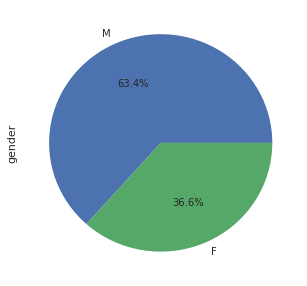

In [149]:
plot_gender.gender.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

males represent 63.4% of the dataset while female 36.6%

I want to study the data  not just for population as whole, but an indivisual personlized level, so let's dig deeper and see 
what the numbers between the columns say to us. 

## Q) how many males and females in each age group? 

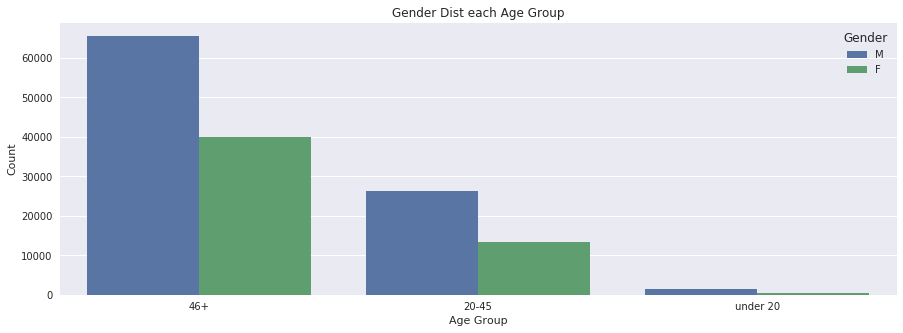

In [134]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "Age_group", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender Dist each Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Gender')

in each age group the males more than females.

## Q) What is the gender distribution in each offer type? 

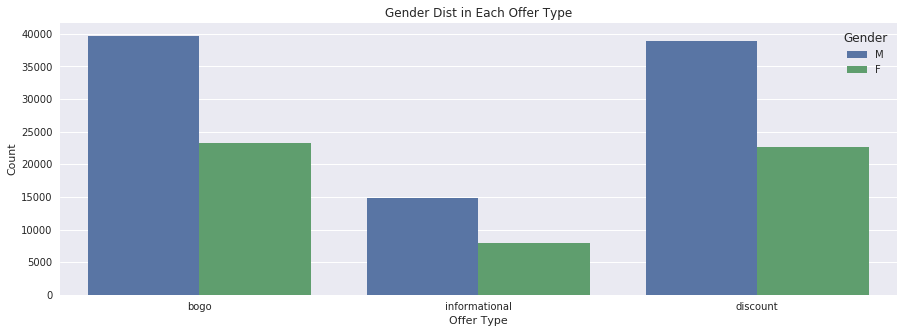

In [53]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "offer_type", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender Dist in Each Offer Type')
plt.ylabel('Count')
plt.xlabel('Offer Type')
plt.legend(title='Gender')

here also, more than 35k uses BOGO and discount offer. while ~ 20.5k of female use them  

## Q) How many male and female completed the offer process?

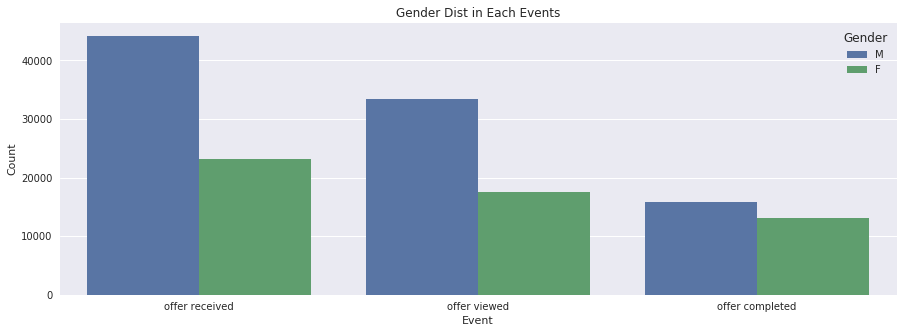

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "event", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender Dist in Each Events')
plt.ylabel('Count')
plt.xlabel('Event')
plt.legend(title='Gender')

## What is the most taken action in each offer type? 

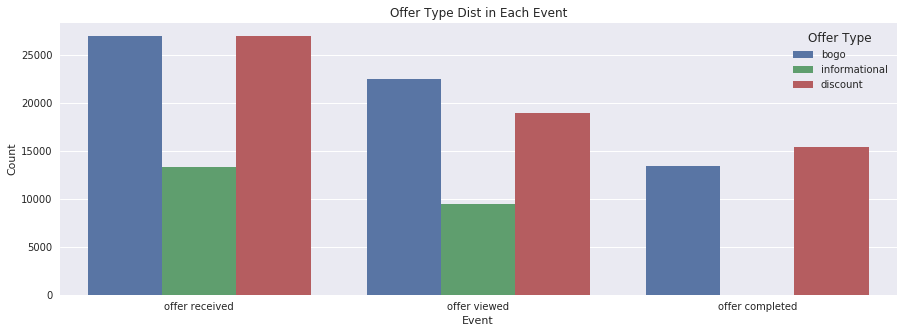

In [151]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "event", hue= "offer_type", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Offer Type Dist in Each Event')
plt.ylabel('Count')
plt.xlabel('Event')
plt.legend(title='Offer Type')

Most people in general take the discount offer. 

## What is the most taken action in each age group? 

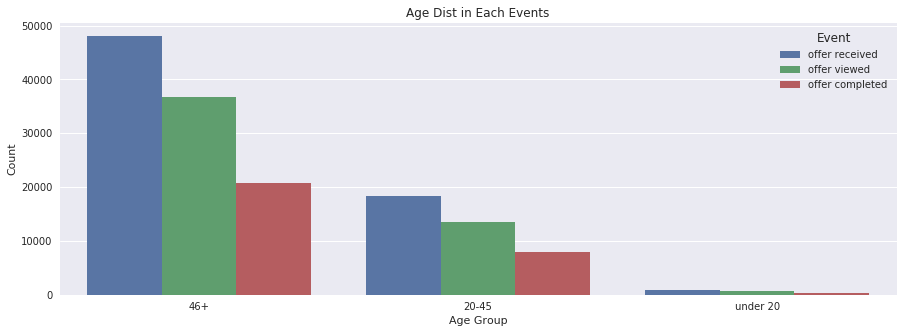

In [56]:
plt.figure(figsize=(15, 5))
sns.countplot(x= "Age_group", hue= "event", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age Dist in Each Events')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Event')

20k of people who is 46 and above completed the offer, while more than 40k of ignored it. 

In [152]:
# d = {'color': ['C0', "#e74c3c"]}
# g = sns.FacetGrid(plot_gender, row='Age_group', col='gender', hue_kws=d, hue='gender', size=5)
# g.map(plt.hist, 'event')

In [153]:
# d = {'color': ['C0', "#e74c3c"]}
# g = sns.FacetGrid(plot_gender, row='Age_group', col='gender', hue_kws=d, hue='gender', size=5)
# g.map(plt.hist, 'offer_type')

## Results 

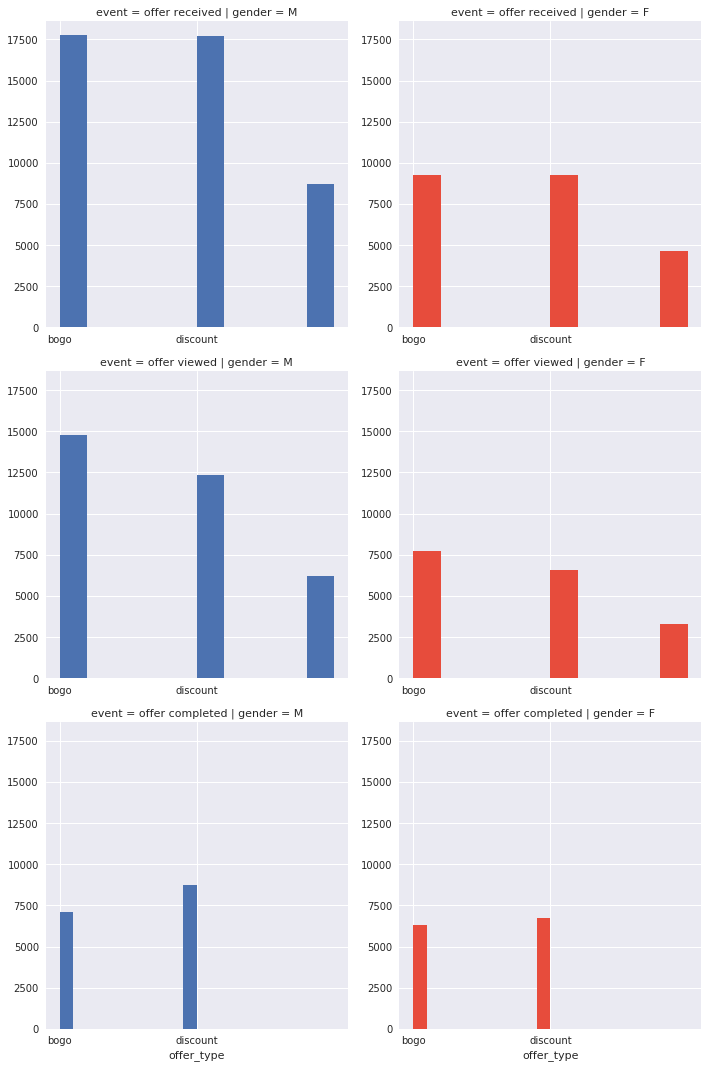

In [59]:
d = {'color': ['C0', "#e74c3c"]}
g = sns.FacetGrid(plot_gender, row='event', col='gender', hue_kws=d, hue='gender', size=5)
g.map(plt.hist, 'offer_type')

from the figures above we can conclude that male represents 63% of the data and tend to use starbucks application more than female, and mostly who is in age 46 and above. Also they seems to prefer discount offer then BOGO. and for the disappointed part, the difference between who didn't pay attention to the offer and who viewed it or complete it is more than 10k. But at the end, we likely have the information that helps us to know which group will response to the offer. The results says that send discount offers to male who's in age 46 or above. 

# Building Model

Besides the result that I got above, I wnt to support my findings and build a model that predict if the customer will response to an offer or no. Fisrt we need to to addition cleaning and prepare the data before use it to build the model.

## Data Preparing II

lets take a look again in the data 

In [60]:
final_df.head()

,channels,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,event,customer_id,time,money_gained,money_spent,became_member_on,gender,customer_income,Age_group
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,0,0.0,0.0,20170909,M,100000.0,46+
1,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,102,0.0,0.0,20170909,M,100000.0,46+
2,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer received,4b0da7e80e5945209a1fdddfe813dbe0,504,0.0,0.0,20170909,M,100000.0,46+
3,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer viewed,4b0da7e80e5945209a1fdddfe813dbe0,510,0.0,0.0,20170909,M,100000.0,46+
4,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer completed,4b0da7e80e5945209a1fdddfe813dbe0,510,10.0,0.0,20170909,M,100000.0,46+


In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149154 entries, 0 to 149153
Data columns (total 15 columns):
channels            149154 non-null object
offer_difficulty    149154 non-null int64
offer_duration      149154 non-null int64
offer_id            149154 non-null object
offer_type          149154 non-null object
offer_reward        149154 non-null int64
event               149154 non-null object
customer_id         149154 non-null object
time                149154 non-null int64
money_gained        149154 non-null float64
money_spent         149154 non-null float64
became_member_on    149154 non-null int64
gender              149154 non-null object
customer_income     149154 non-null float64
Age_group           149154 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 18.2+ MB


## Assessment:

- Encode categorical data such as gender , offer type , channel and age groups 
- Encode the 'event' data to numerical values, as:
    - offer received ----> 1
    - offer viewed ----> 2
    - offer completed ----> 3
- Encode offer id & customer id
- drop became_member_ add new columns for the year and month instead
- scale and normlize numrical data 

**This function of will take time**

In [86]:
def cleaning_final_data(df):
    """
       Return a cleaned data and label that ready for building a model
       
       inputs:
       --------
       df : the dataframe
       
    """
    #process categorical variables
    categorical = ['offer_type', 'gender', 'Age_group']
    df = pd.get_dummies(df, columns = categorical)
    #process channel column 
    df = df.drop('channels', 1).join(df.channels.str.join('|').str.get_dummies())
    
    #process became_member_on column
    #chane the datatype of became_member_on 
    df['became_member_on'] = df['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    #add new columns for the year and month 
    df['month_member'] = df['became_member_on'].apply(lambda x: x.day)
    df['year_member'] = df['became_member_on'].apply(lambda x: x.year)
    #drop
    df.drop('became_member_on',axis=1, inplace=True)    
    
    #process offer_id column , refrence http://martinhjelm.github.io/2017/11/12/Pandas-Replacing-Strings-In-A-Column/
    offerids = df['offer_id'].unique().tolist()
    o_mapping = dict( zip(offerids,range(len(offerids))) )
    df.replace({'offer_id': o_mapping},inplace=True)
    
    #process customer id column
    cusids = df['customer_id'].unique().tolist()
    c_mapping = dict( zip(cusids,range(len(cusids))) )
    df.replace({'customer_id': c_mapping},inplace=True)
    
    #process numerical variables
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    numerical = ['customer_income', 'offer_difficulty', 'offer_duration', 'offer_reward', 'time', 'money_gained', 'money_spent']
    df[numerical] = scaler.fit_transform(df[numerical])
    
    #Encode the 'income_raw' data to numerical values
    df['event'] = df['event'].map({'offer received':1,'offer viewed':2, 'offer completed':3})
    
    return df
    

In [87]:
cleaned_data=  cleaning_final_data(final_df)

In [88]:
#check the data
cleaned_data.head(10)

,offer_difficulty,offer_duration,offer_id,offer_reward,event,customer_id,time,money_gained,money_spent,customer_income,...,gender_O,Age_group_20-45,Age_group_46+,Age_group_under 20,email,mobile,social,web,month_member,year_member
0,0.5,0.571429,0,1.0,1,0,0.000000,0.0,0.0,0.777778,...,0,0,1,0,1,1,1,0,9,2017
1,0.5,0.571429,0,1.0,2,0,0.142857,0.0,0.0,0.777778,...,0,0,1,0,1,1,1,0,9,2017
2,0.5,0.571429,0,1.0,1,0,0.705882,0.0,0.0,0.777778,...,0,0,1,0,1,1,1,0,9,2017
3,0.5,0.571429,0,1.0,2,0,0.714286,0.0,0.0,0.777778,...,0,0,1,0,1,1,1,0,9,2017
4,0.5,0.571429,0,1.0,3,0,0.714286,1.0,0.0,0.777778,...,0,0,1,0,1,1,1,0,9,2017
5,0.0,0.142857,1,0.0,1,0,0.571429,0.0,0.0,0.777778,...,0,0,1,0,1,1,0,1,9,2017
6,0.0,0.142857,1,0.0,2,0,0.655462,0.0,0.0,0.777778,...,0,0,1,0,1,1,0,1,9,2017
7,1.0,1.000000,2,0.5,1,0,0.235294,0.0,0.0,0.777778,...,0,0,1,0,1,0,0,1,9,2017
8,1.0,1.000000,2,0.5,2,0,0.243697,0.0,0.0,0.777778,...,0,0,1,0,1,0,0,1,9,2017
9,1.0,1.000000,2,0.5,3,0,0.252101,0.5,0.0,0.777778,...,0,0,1,0,1,0,0,1,9,2017


In [89]:
#final column list
cleaned_data.columns

Index(['offer_difficulty', 'offer_duration', 'offer_id', 'offer_reward',
       'event', 'customer_id', 'time', 'money_gained', 'money_spent',
       'customer_income', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational', 'gender_F', 'gender_M', 'gender_O',
       'Age_group_20-45', 'Age_group_46+', 'Age_group_under 20', 'email',
       'mobile', 'social', 'web', 'month_member', 'year_member'],
      dtype='object')

In [90]:
cleaned_data.shape

(149154, 25)

In [91]:
#check label
cleaned_data.event.value_counts()

1    68198
2    51624
3    29332
Name: event, dtype: int64

In [92]:
#save the cleaned veriosn of the data 
cleaned_data.to_csv('data/cleaned_data.csv')

## Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 60% of the data will be used for training and 40% for testing.

In [94]:
cleaned_data = pd.read_csv('data/cleaned_data.csv')
data = cleaned_data.drop('event', axis=1)
label = cleaned_data['event']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size = 0.4, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 89492 samples.
Testing set has 59662 samples.


## Training and Testing Stage

### Metrics 

I will compare between four machine learning algorthims: Rnadom forest , MultinomialNB, KNeighborsClassifier and DecisionTreeClassifier based on therir F1 score. I chose these models because they work well on large dataset and for multi classification problem. 
I choose F1 score as evaluation metrics because the data is consider as imbalanced data as shown in the pie chart below. 45.7% for offer received (labeled 1) , 34.6% for offer viewed (labeled 2 )and 19.7% for offer completed (labeled 3). for this reason, F1 score is good choice for this purpose.

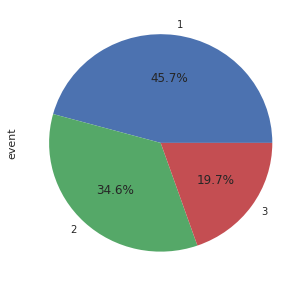

In [109]:
label.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

In [154]:
def train_test(clf):
    """
       Return train and test F1 score with the model name
       
       inputs:
       --------
       clf : the learner
       
    """
    train_prediction =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1 =  accuracy_score(y_train, train_prediction)*100
    test_f1= fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name = clf.__class__.__name__
    
    return train_f1, test_f1, name

-  RandomForestClassifier

In [112]:
clf_A = RandomForestClassifier(random_state=10)
a_train_f1 , a_test_f1, a_model= train_test(clf_A)

- MultinomialNB

In [113]:
clf_B = MultinomialNB()
b_train_f1 , b_test_f1 , b_model= train_test(clf_B)

- KNeighborsClassifier

In [114]:
clf_C = KNeighborsClassifier(n_neighbors = 5)
c_train_f1 , c_test_f1 , c_model = train_test(clf_C)

- DecisionTreeClassifier

In [116]:
clf_D = DecisionTreeClassifier(random_state=10)
d_train_f1 , d_test_f1 , d_model = train_test(clf_D)

### **Results**

In [119]:
#comapre 
models = {'classifier': [ a_model , b_model , c_model,d_model], 
          'train F1 score ':[a_train_f1 , b_train_f1, c_train_f1,d_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_acc,d_test_f1] }
          
classifiers = pd.DataFrame(models)

In [120]:
classifiers

,classifier,train F1 score,test F1 score
0,RandomForestClassifier,97.922719,73.115216
1,MultinomialNB,34.663434,34.422245
2,KNeighborsClassifier,52.701917,29.217928
3,DecisionTreeClassifier,100.000000,83.166840


from the table above we can see that DecisionTreeClassifier has the best scores, 100% on training and 83.16% on testing.
as the testing score is kinda good here, but to avoid overfitting problem as much as possible, I will use Decision Tree with K-folds cross validation. whch is a good way to train and test the data. 

### Improvements

In [160]:
def crossval(clf,n):
    """
       use cross validation on the provided model with and
       retur f1 score
       
       inputs:
       --------
       clf : the learner
       n: number of folds
    """
        
    f1_score = cross_val_score(clf, data, label, scoring='f1_micro', cv = 10).mean() * 100
    
    return f1_score

In [161]:
print("F1 score of model is: " , crossval(clf_D,10))

F1 score of model is:  81.8858434225


# Final results an Justifiations 

As our problem is not that senstive or require very large f1-score, I see that 81.8% score for ppredicting if the customer will response to the offer or not is good and can be used for this classification purpose. 